In [2]:
import numpy as np                 # Numpy: módulo fundamental de python para poder operar
import matplotlib.pyplot as plt    # Para poder pintar gráficas
%matplotlib inline
import os

fpaths = []       # fpaths:  'audio/apple/apple07.wav'  array path de carpeta 'audio'
labels = []       # labels: array palabras repetidas (7 veces apple, 7 veces kiwi.. etc)
spoken = []       # spoken: array palabras (no repetidas)
for f in os.listdir("audio"):  # os.listdir: nos permite buscar en una ruta determinada
                               #   (nosotros buscamos f que seria las palabras habladas)
    if f not in ".DS_Store":
        for w in os.listdir("audio/" + f):
            fpaths.append("audio/" + f + '/' + w)
            labels.append(f)
            if f not in spoken:
                spoken.append(f)
                
print('Words spoken:', spoken)

#print ('labels:', labels)

#print ('fpaths:', fpaths)

('Words spoken:', ['apple', 'kiwi', 'lime', 'banana', 'pineapple', 'orange', 'peach'])


In [3]:
from scipy.io import wavfile

data = np.zeros((len(fpaths), 32000)) 
maxsize = -1
for n,file in enumerate(fpaths):    
        
    _, d = wavfile.read(file)      
    data[n, :d.shape[0]] = d 
    
    if d.shape[0] > maxsize:
        maxsize = d.shape[0]
        
data = data[:, :maxsize]
print(maxsize)

#Each sample file is one row in data, and has one entry in labels
# Cada archivo es una fila en datos y tiene una entrada de etiquetas
print('Number of files total:', data.shape[0])

all_labels = np.zeros(data.shape[0])   
print 'Matriz all_labels comienzo: ', all_labels



for n, l in enumerate(set(labels)):
    all_labels[np.array([i for i, _ in enumerate(labels) if _ == l])] = n   


print
print 'Labels and label indices', all_labels


print all_labels.shape      # all_labels: conseguimos que los archivos se extraerán en una sola matriz de datos 
                            # y creamos un vector de etiqueta con la etiqueta correcta para cada archivo de datos.
    
print(data.shape)     # .shape: nos devuelve las dimensiones de una matriz
print (data.shape[0])  

6966
('Number of files total:', 105)
Matriz all_labels comienzo:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Labels and label indices [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2.]
(105,)
(105, 6966)
105


(216, 32)
(216, 32)


<Figure size 432x288 with 0 Axes>

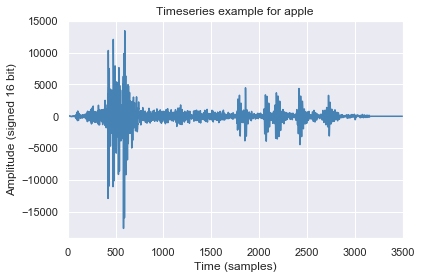

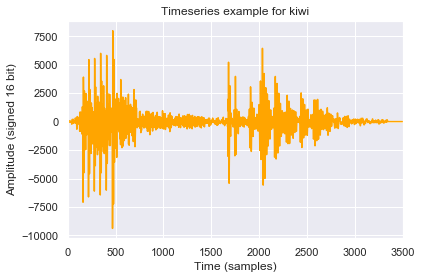

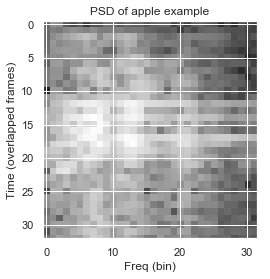

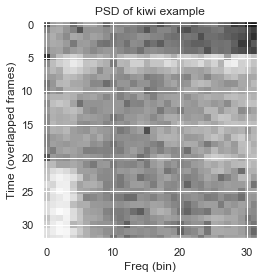

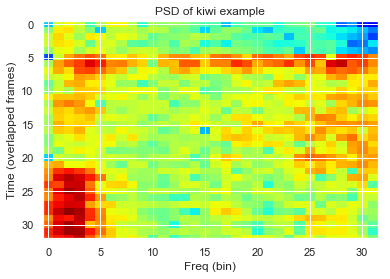

<Figure size 432x288 with 0 Axes>

In [25]:
import scipy

def stft(x, fftsize=64, overlap_pct=.5):    # Para encontrar picos en la frecuencia, se utiliza una técnica llamada
                                            # la Transformada de Fourier de tiempo corto (STFT).
                                            #tamaño de la ventana fftsize = 64
                                            #superposición overlap = 0.5
        
# La idea es bastante simple: la FFT se aplica sobre los fragmentos de los datos de entrada, lo que da como resultado 
# una "imagen" de FFT 2D, generalmente llamada espectrograma. Establecer el tamaño de FFT nos permite controlar la 
# cantidad de resolución de frecuencia disponible, mientras que la superposición de estas ventanas nos permite 
# controlar la resolución de tiempo al coste de aumentar el tamaño de los datos. Por lo que tendremos 
# 3 cuadros FFT que se han extraído de la muestra de entrada X. Para nuestra extracción de características, 
# a continuación, encontraremos picos en cada fila de STFT_X.
   
    #Modified from http://stackoverflow.com/questions/2459295/stft-and-istft-in-python
    
    hop = int(fftsize * (1 - overlap_pct))      # hop es el salto 
    w = scipy.hanning(fftsize + 1)[:-1]         # ventana hanning
    raw = np.array([np.fft.rfft(w * x[i:i + fftsize]) for i in range(0, len(x) - fftsize, hop)])
    return raw[:, :(fftsize // 2)]
    

#####################

#   Dibujamos las señales en el tiempo

#####################


import matplotlib.pyplot as plt
plt.plot(data[0, :], color='steelblue')
plt.title('Timeseries example for %s'%labels[0])
plt.xlim(0, 3500)    # xlim(left,righ) -> establece los limites 
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (signed 16 bit)')
plt.figure()


import matplotlib.pyplot as plt
plt.plot(data[10, :], color='orange')
plt.title('Timeseries example for %s'%labels[20])
plt.xlim(0, 3500)    # xlim(left,righ) -> establece los limites 
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (signed 16 bit)')
plt.figure()


#####################

#   Dibujamos los espectro s

#####################


# + 1 to avoid log of 0
log_freq = 20 * np.log(np.abs(stft(data[0, :])) + 1)
print(log_freq.shape)

plt.imshow(log_freq, cmap='gray', interpolation=None)
plt.xlabel('Freq (bin)')
plt.ylabel('Time (overlapped frames)')
plt.ylim(log_freq.shape[1])
plt.title('PSD of %s example'%labels[0])
plt.figure()


# + 1 to avoid log of 0
log_freq = 20 * np.log(np.abs(stft(data[20, :])) + 1)
print(log_freq.shape)

plt.imshow(log_freq, cmap='gray', interpolation=None)
plt.xlabel('Freq (bin)')
plt.ylabel('Time (overlapped frames)')
plt.ylim(log_freq.shape[1])
plt.title('PSD of %s example'%labels[20])
plt.figure()


plt.imshow(log_freq, cmap=plt.cm.jet, interpolation=None, aspect='auto')
plt.xlabel('Freq (bin)')
plt.ylabel('Time (overlapped frames)')
plt.ylim(log_freq.shape[1])
plt.title('PSD of %s example'%labels[20])
plt.figure()

In [26]:
from numpy.lib.stride_tricks import as_strided

#Peak detection using the technique described here: http://kkjkok.blogspot.com/2013/12/dsp-snippets_9.html 


# Funcion peakfind : permite estimar aproximadamente los parámetros A,u, sig que se ajustaran a 
#la descomposicion gausiana

def peakfind(x, n_peaks, l_size=3, r_size=3, c_size=3, f=np.mean):
    win_size = l_size + r_size + c_size   # Tamaño de la ventana 
    shape = x.shape[:-1] + (x.shape[-1] - win_size + 1, win_size)
    strides = x.strides + (x.strides[-1],)
    xs = as_strided(x, shape=shape, strides=strides)  # Cree una vista en la matriz con la forma y 
                                                      # los pasos dados.
    def is_peak(x):
        centered = (np.argmax(x) == l_size + int(c_size/2))
        l = x[:l_size]
        c = x[l_size:l_size + c_size]
        r = x[-r_size:]
        passes = np.max(c) > np.max([f(l), f(r)])
        if centered and passes:
            return np.max(c)
        else:
            return -1
    r = np.apply_along_axis(is_peak, 1, xs)
    top = np.argsort(r, None)[::-1]
    heights = r[top[:n_peaks]]
    #Add l_size and half - 1 of center size to get to actual peak location
    top[top > -1] = top[top > -1] + l_size + int(c_size / 2.)
    return heights, top[:n_peaks]




(32,)
[8745 1067   -1   -1   -1   -1]
[ 8 21 27 14  5  6]

[ 8 21]
[8745 1067]


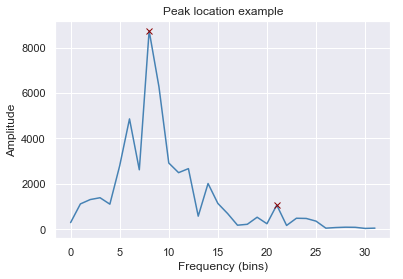

In [27]:
plot_data = np.abs(stft(data[0, :]))[30, :]     #  Funcion abs se usa para devolver el valor absoluto de un numero 
                                                #  (devolver un entero, sin comas) 
print(plot_data.shape)
values, locs = peakfind(plot_data, n_peaks=6)
fp = locs[values > -1]
fv = values[values > -1]
plt.plot(plot_data, color='steelblue')
plt.plot(fp, fv, 'x', color='darkred')    # color: darkred
plt.title('Peak location example')
plt.xlabel('Frequency (bins)')
plt.ylabel('Amplitude')
print(values)
print(locs)

print
print fp
print fv

In [28]:
 all_obs = []
for i in range(data.shape[0]):
    d = np.abs(stft(data[i, :]))
    n_dim = 6
    obs = np.zeros((n_dim, d.shape[0]))
  
    for r in range(d.shape[0]):
        _, t = peakfind(d[r, :], n_peaks=n_dim)
        obs[:, r] = t.copy()
       
    if i % 10 == 0:
        print("Processed obs %s" % i)
        print obs
    all_obs.append(obs)
    
all_obs = np.atleast_3d(all_obs)





Processed obs 0
[[ 9.  4.  6. ... 27. 27. 27.]
 [17. 24. 12. ... 26. 26. 26.]
 [23. 14. 21. ...  5.  5.  5.]
 [27.  5. 27. ...  6.  6.  6.]
 [14.  6. 14. ...  7.  7.  7.]
 [ 5.  7.  5. ...  8.  8.  8.]]
Processed obs 10
[[ 6.  6.  6. ... 27. 27. 27.]
 [19. 20. 20. ... 26. 26. 26.]
 [27. 27. 27. ...  5.  5.  5.]
 [14. 14. 14. ...  6.  6.  6.]
 [ 5.  5.  5. ...  7.  7.  7.]
 [ 7.  7.  7. ...  8.  8.  8.]]
Processed obs 20
[[ 6.  7. 14. ... 27. 27. 27.]
 [25. 18. 27. ... 26. 26. 26.]
 [19. 26. 26. ...  5.  5.  5.]
 [27. 27.  5. ...  6.  6.  6.]
 [14. 14.  6. ...  7.  7.  7.]
 [ 5.  5.  7. ...  8.  8.  8.]]
Processed obs 30
[[25. 24. 11. ... 27. 27. 27.]
 [27. 18. 16. ... 26. 26. 26.]
 [14. 12. 22. ...  5.  5.  5.]
 [ 5. 27. 27. ...  6.  6.  6.]
 [ 6. 14. 14. ...  7.  7.  7.]
 [ 7.  5.  5. ...  8.  8.  8.]]
Processed obs 40
[[14. 14. 10. ... 27. 27. 27.]
 [27. 19. 25. ... 26. 26. 26.]
 [26. 27. 27. ...  5.  5.  5.]
 [ 5.  5. 14. ...  6.  6.  6.]
 [ 6.  6.  5. ...  7.  7.  7.]
 [ 7.  7.  6.

Dividimos la matriz en test y train: 

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)


for n,i in enumerate(all_obs):
    all_obs[n] /= all_obs[n].sum(axis=0)

for train_index, test_index in sss.split(all_obs, all_labels):
    x_train, x_test = all_obs[train_index, ...], all_obs[test_index, ...]
    y_train, y_test = all_labels[train_index], all_labels[test_index]
print('Size of training matrix:', x_train.shape)

print('Size of testing matrix:', x_test.shape)

('Size of training matrix:', (52, 6, 216))
('Size of testing matrix:', (53, 6, 216))


----------------------------------
   REDES NEURONALES
----------------------------------

Utilizaremos Keras que es una librería de alto nivel, para que nos sea más fácil describir las capas de la red que creamos.
En background, es decir, el motor que ejecutará la red neuronal y la entrenará será la implementación llamada Tensorflow, que es la mejor que existe hoy en día.

Utilizaremos numpy para el manejo de arrays. 

De Keras importamos el tipo de modelo Sequential y el tipo de capa Dense que es la «normal».

In [187]:
# Normalizamos matriz: 

import tensorflow.keras as keras

import tensorflow as tf

import numpy



# Fix random seed for reproducibility.
# seed = 7
# numpy.random.seed(seed)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [188]:
# * * * * * * * * * * * * * * * * * * * *
#                                       
#          MODELO SECUENCIAL 
#    (las cosas, secuencias van a ir 
#        en orden directo)
#
# * * * * * * * * * * * * * * * * * * * *


# Primero creamos un modelo vació de tipo Sequential. 
# Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, «una delante de otra».

model = tf.keras.models.Sequential()

# -------------


## Ahora vamos a rellenar las capas de nuestra red neural.
## Keras tiene un modulo para esto: flatten 

# Agregamos capas Dense con «model.add()». Realmente el numero de capas que tendremos serán, 
# estas que agregamos y la primera de Sequential

# * * * * * * * * * * * * * * * * * * * *
#                                       
#         AGREGAMOS CAPAS
#        A LA RED NEURONAL
#
# * * * * * * * * * * * * * * * * * * * *

model.add(tf.keras.layers.Flatten()) #Flatten convierte la matriz en un simple array



model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(7, activation=tf.nn.softmax))

# -------------

# Antes de de entrenar la red haremos unos ajustes de nuestro modelo:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Con esto indicamos el tipo de pérdida (loss) que utilizaremos, 
# el «optimizador» de los pesos de las conexiones de las neuronas y 
# las métricas que queremos obtener (accuracy en nuestro caso).

# -------------
# Ajustes al modelo, antes de entrenar la red neuronal.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [189]:
# - - - - - - - - - - - - - - -  - 
# - Entrenamos a la red neuronal - 
# - - - - - - - - - - - - - - -  -
print(x_train.shape)
history = model.fit(x_train, y_train, epochs=8)


val_loss, val_acc = model.evaluate(x_test, y_test)
#print(val_loss)
#print(val_acc)
#print(val_acc*100)


    
print("\n%s: %.2f%%" % (model.metrics_names[1], val_acc*100))




(52, 6, 216)
Train on 52 samples
Epoch 1/8
52/52 [==============================] - 0s 5ms/sample - loss: 2.0622 - accuracy: 0.1346
Epoch 2/8
52/52 [==============================] - 0s 168us/sample - loss: 1.7484 - accuracy: 0.2308
Epoch 3/8
52/52 [==============================] - 0s 242us/sample - loss: 1.5339 - accuracy: 0.5577
Epoch 4/8
52/52 [==============================] - 0s 276us/sample - loss: 1.3763 - accuracy: 0.7115
Epoch 5/8
52/52 [==============================] - 0s 197us/sample - loss: 1.2786 - accuracy: 0.7115
Epoch 6/8
52/52 [==============================] - 0s 183us/sample - loss: 1.1091 - accuracy: 0.7885
Epoch 7/8
52/52 [==============================] - 0s 196us/sample - loss: 0.9720 - accuracy: 0.9615
Epoch 8/8
53/53 [==============================] - 0s 1ms/sample - loss: 1.1182 - accuracy: 0.8679

accuracy: 86.79%


In [190]:
# - - - - - - - - - - - - - - - - 
# - - - EVALUAMOS EL MODELO - - -
# - - - - - - - - - - - - - - - -

scores = model.evaluate(x_train, y_train)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)
print(val_acc*100)



    
print("\n%s: %.2f%%" % (model.metrics_names[1], val_acc*100))
#print('Test accuracy:', val_acc*100)

52/52 [==============================] - 0s 107us/sample - loss: 0.7883 - accuracy: 0.9423

accuracy: 94.23%
53/53 [==============================] - 0s 94us/sample - loss: 1.1182 - accuracy: 0.8679
1.1182159567778964
0.8679245
86.79245114326477

accuracy: 86.79%


In [191]:
classes=[0,1,2,3,4,5,6]
classes_test = ['apple', 'kiwi', 'lime','banana', 'pineapple', 'orange', 'peach']
y_pred=model.predict_classes(x_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

In [192]:
import pandas as pd

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes_test, 
                     columns = classes_test)



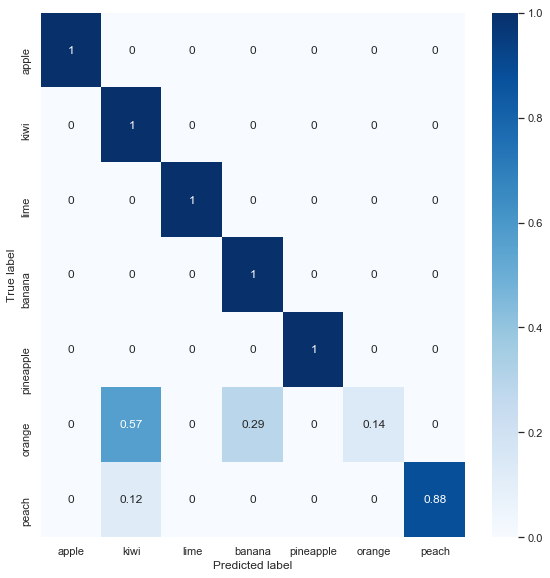

In [193]:
import seaborn as sns; sns.set()

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### CONCLUSIONES ( y comparación con Modelos Ocultos de Marcov ) :


- Palabras 100% reconocidas correctamente con Deep Learning: 
    - apple
    - lime
    - pineaple
    - peach

- Palabras 100% reconocidas correctamente con Modelos Ocultos de Marcov: 
    - apple
    - lime

- Con Deep Learning conseguimos acertar 3 palabras más, 100% correctamente.

- Palabras que fallan en deep lerning: 
    - kiwi --> acierta un 75%, cuando falla es porque ha predecido peach.
    - orange --> la ha predecido un 43%, cuando ha fallado ha predecido peach.
    - (si entrenamos mas el modelo las predice correctamente).

In [194]:
# Python script for confusion matrix creation. 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

actual = y_test 
predicted = y_pred
results = confusion_matrix(actual, predicted) 

print 'Confusion Matrix :'
print(results) 
print 'Accuracy Score :',accuracy_score(actual, predicted) 
print 'Report : '
print classification_report(actual, predicted, target_names= spoken) 



Confusion Matrix :
[[7 0 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 0 7 0 0 0]
 [0 0 0 0 8 0 0]
 [0 4 0 2 0 1 0]
 [0 1 0 0 0 0 7]]
Accuracy Score : 0.8679245283018868
Report : 
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         7
        kiwi       0.62      1.00      0.76         8
        lime       1.00      1.00      1.00         8
      banana       0.78      1.00      0.88         7
   pineapple       1.00      1.00      1.00         8
      orange       1.00      0.14      0.25         7
       peach       1.00      0.88      0.93         8

   micro avg       0.87      0.87      0.87        53
   macro avg       0.91      0.86      0.83        53
weighted avg       0.91      0.87      0.84        53



#### Representacion de Matriz de confusion para el modelo

- Tasa de clasificacion/prediccion: Accuracy = (TP + TN) / (TP + TN + FP + FN)= 0.89

- Recall : nos da una idea de cuándo es realmente sí, con qué frecuencia predice sí. Recuperación = TP / (TP + FN) = 0.89

- Precision : nos dice cuándo predice sí, con qué frecuencia es correcta. Precisión = TP / (TP + FP) = 100 / (100 + 10) = 0.89

Text(0.5,0,'Predicted label')

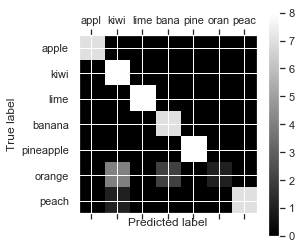

In [195]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, predicted)
plt.matshow(cm, cmap='gray')
ax = plt.gca()
_ = ax.set_xticklabels([" "] + [l[:4] for l in spoken])
_ = ax.set_yticklabels([" "] + spoken)
#plt.title('Confusion matrix, single speaker')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')